# Project

We start by loading in the dataset with all elon musk quotes between 2015 and 2020 that mentions an organization according to spacy lg.

In [2]:
import pandas as pd
elon_org_df = pd.read_csv('Data/org-lg-Elon Musk.csv.bz2')
elon_org_df

,ORG,date,numOccurrences,quotation,quoteID,probas
0,Apple,2015-10-14 10:18:21,1,Elon Musk: Apple hired the Tesla engineers we'...,2015-10-14-022047,"[['Elon Musk', '0.5569'], ['None', '0.4431']]"
1,Tesla,2015-10-14 10:18:21,1,Elon Musk: Apple hired the Tesla engineers we'...,2015-10-14-022047,"[['Elon Musk', '0.5569'], ['None', '0.4431']]"
2,Elon,2015-10-24 17:38:27,1,Each employee receives a warning before going ...,2015-10-24-009987,"[['Elon Musk', '0.6133'], ['None', '0.3867']]"
3,FILAMENTO,2015-03-16 12:32:13,1,Anyone who has used a 3D printer is aware of t...,2015-03-16-004684,"[['Elon Musk', '0.9319'], ['None', '0.0681']]"
4,Orbital Sciences,2015-07-21 18:52:01,4,"The last year has seen three failures: ours, O...",2015-07-21-089084,"[['Elon Musk', '0.973'], ['None', '0.027']]"
...,...,...,...,...,...,...
10252,EPA,2020-01-30 12:15:21,2,"Regarding Model Y, it was only 10 months ago t...",2020-01-30-074842,"[['Elon Musk', '0.8967'], ['None', '0.1033']]"
10253,Twitter,2020-03-03 04:49:04,3,Just want say that I support @Jack as Twitter ...,2020-03-03-036523,"[['Elon Musk', '0.4316'], ['Jack Dorsey', '0.2..."
10254,NASA,2020-02-11 17:35:22,2,NASA called and told us that we'd won a ($1.6 ...,2020-02-11-061218,"[['Elon Musk', '0.8313'], ['None', '0.1625'], ..."
10255,FSD,2020-03-05 10:06:08,3,Perhaps they weren't aware that the computer i...,2020-03-05-052924,"[['Elon Musk', '0.95'], ['None', '0.05']]"


---
Then we make a dataframe that shows the most common organizations

In [3]:
org_count_df = elon_org_df.groupby(['ORG']).size().reset_index(name='counts').sort_values('counts', ascending=False)
org_count_df.head(20)

,ORG,counts
1060,Tesla,3217
978,SpaceX,494
677,Model 3,215
397,Falcon Heavy,167
127,BFR,151
734,NASA,146
91,Apple,124
383,Falcon,120
338,Elon,117
1446,the Model 3,107


---
Here we plot the stockprice for the first company in the two weeks following the quote.

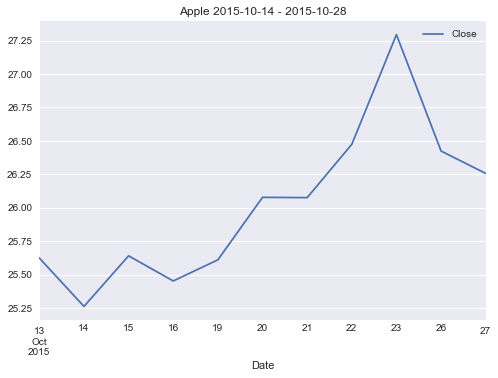

,Close
Date,
2015-10-13,25.624229
2015-10-14,25.262066
2015-10-15,25.640278
2015-10-16,25.452316
2015-10-19,25.610479
2015-10-20,26.078079
2015-10-21,26.075788
2015-10-22,26.474625
2015-10-23,27.295227


In [3]:
from financials import stock_history
from financials import get_dates

start_date, end_date = get_dates(elon_org_df.iloc[0]['date'], 2, 0)
stock_df = stock_history(elon_org_df.iloc[0]['ORG'], start_date, end_date, plot=True)
stock_df

---
Here we make a dataframe with only quotes that contain the company Apple

In [4]:
apples = elon_org_df[elon_org_df['ORG'] == 'Apple']
apples

,ORG,date,numOccurrences,quotation,quoteID,probas
0,Apple,2015-10-14 10:18:21,1,Elon Musk: Apple hired the Tesla engineers we'...,2015-10-14-022047,"[['Elon Musk', '0.5569'], ['None', '0.4431']]"
9,Apple,2015-10-09 11:30:14,1,They have hired people we've fired. We always ...,2015-10-09-112605,"[['Elon Musk', '0.9157'], ['None', '0.0843']]"
38,Apple,2015-10-09 16:50:01,1,We always jokingly call Apple the `Tesla Grave...,2015-10-09-123220,"[['Elon Musk', '0.8365'], ['None', '0.1635']]"
44,Apple,2015-05-06 23:48:00,3,I actually hope Apple gets into the car busine...,2015-05-06-014632,"[['Elon Musk', '0.7976'], ['None', '0.2024']]"
49,Apple,2015-12-26 06:45:28,1,Important engineers? Apple hired people we've ...,2015-12-26-017915,"[['Elon Musk', '0.9534'], ['None', '0.0466']]"
...,...,...,...,...,...,...
7532,Apple,2018-11-02 20:02:14,1,"And so Apple did that for a long time, I still...",2018-11-02-006794,"[['Elon Musk', '0.8878'], ['None', '0.1122']]"
8952,Apple,2019-05-21 19:44:39,1,"If Apple had interest then, they would probabl...",2019-05-21-043076,"[['Elon Musk', '0.6208'], ['None', '0.3792']]"
9033,Apple,2019-07-23 14:00:00,7,"If you don't make it at Tesla, you go work at ...",2019-07-23-028560,"[['Elon Musk', '0.9015'], ['None', '0.0985']]"
9090,Apple,2019-01-08 21:20:50,1,more important to society than [ Apple founder...,2019-01-08-054226,"[['Elon Musk', '0.8839'], ['None', '0.1161']]"


---
Finally we plot all the graphs of the following weeks after 'apple quotes'

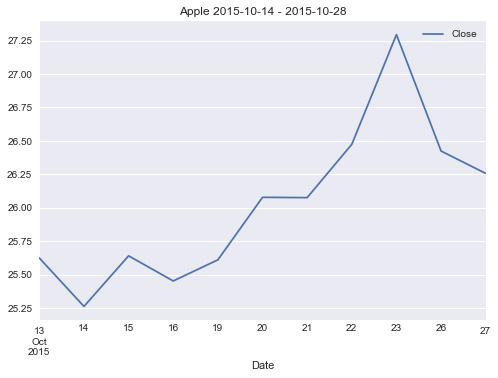

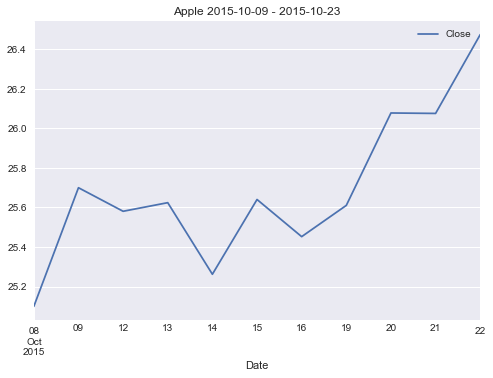

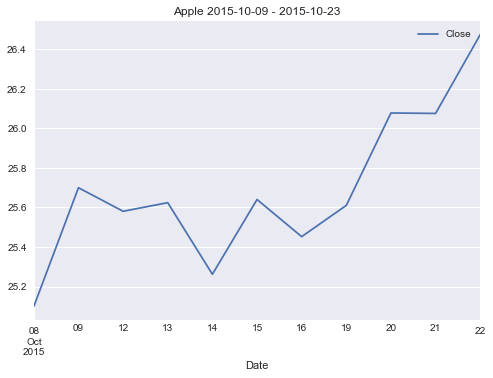

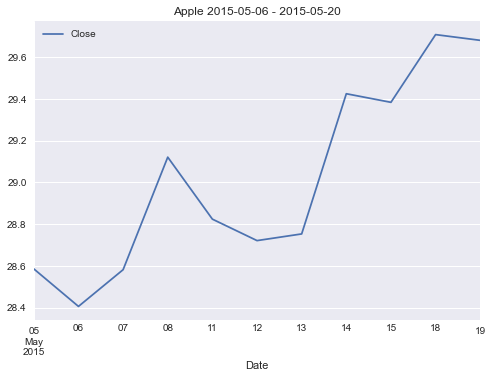

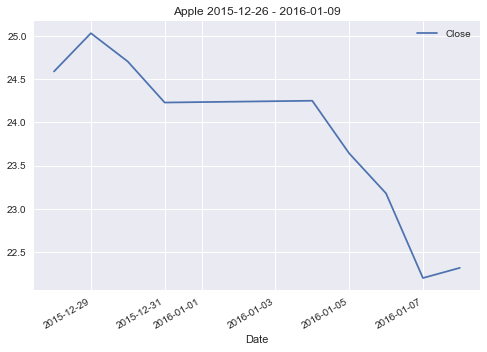

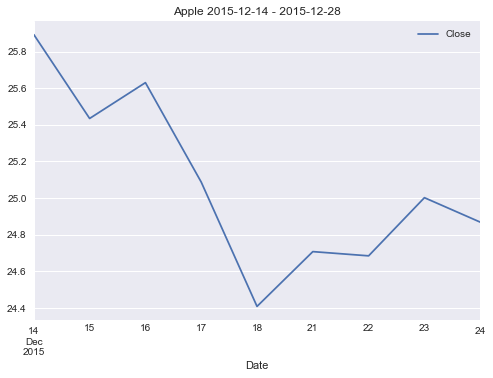

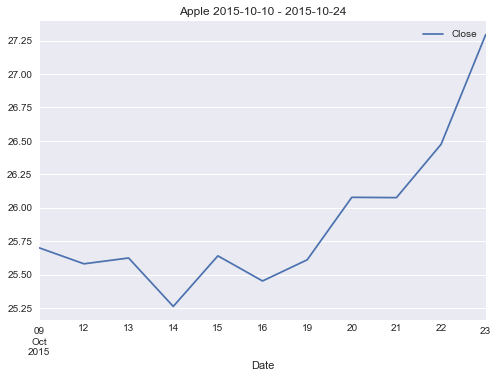

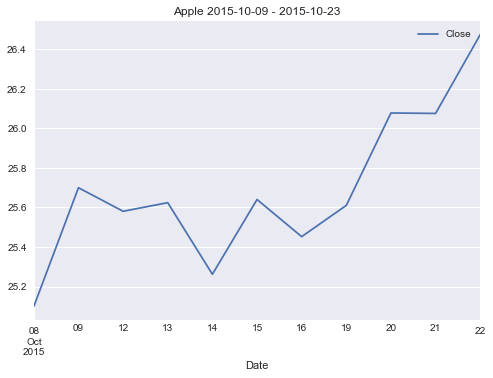

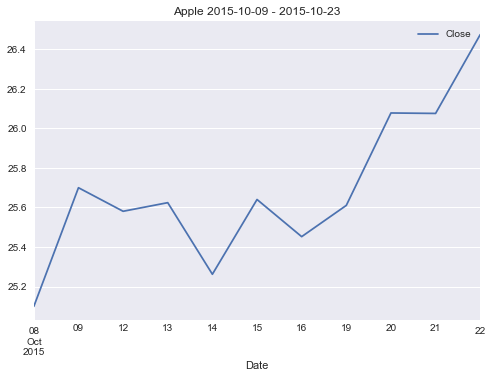

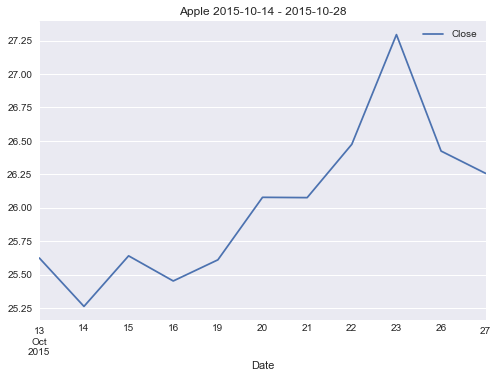

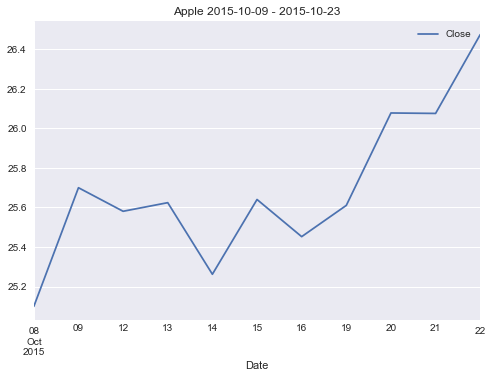

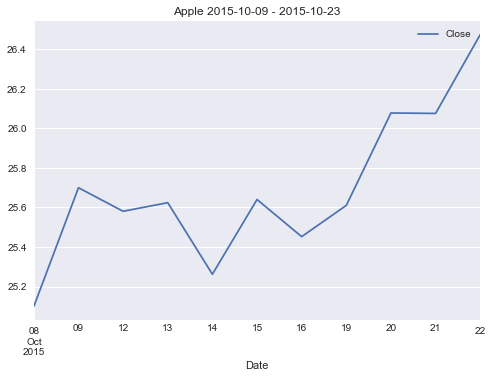

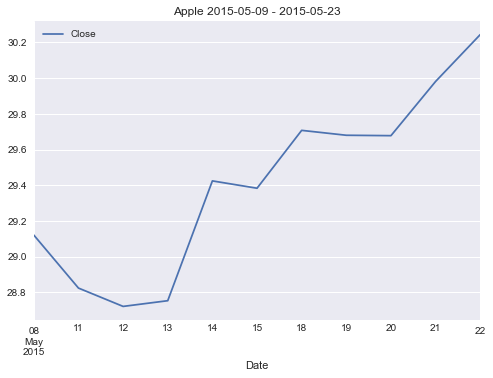

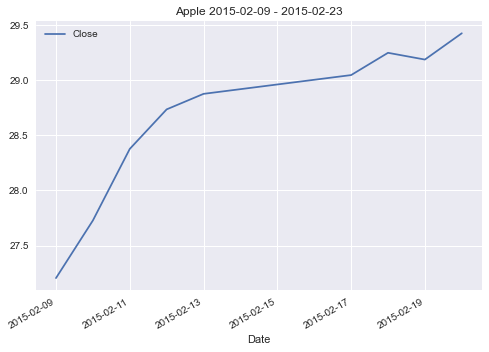

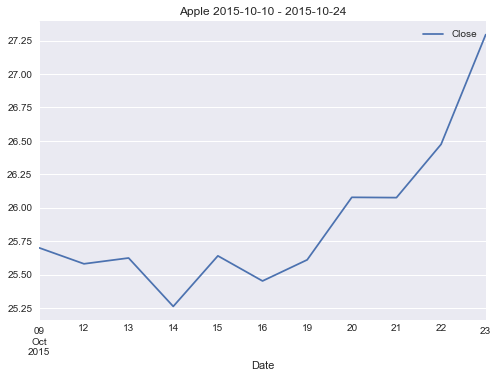

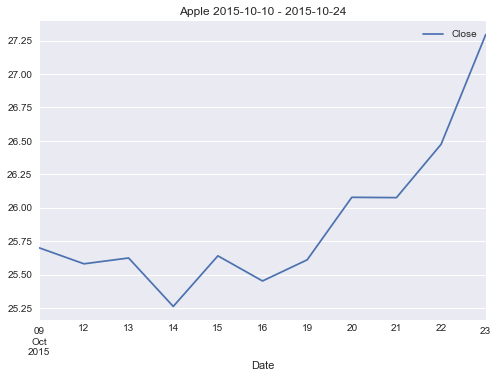

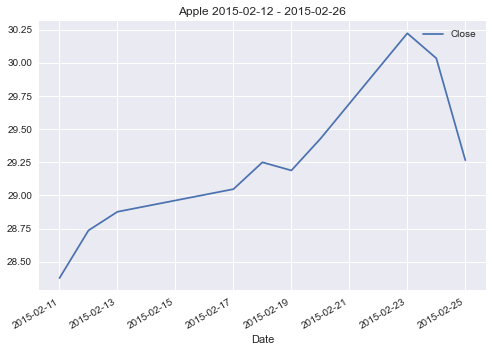

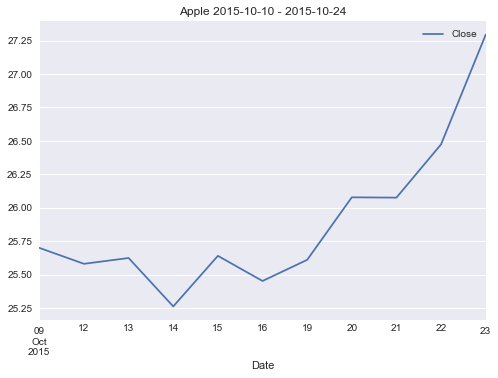

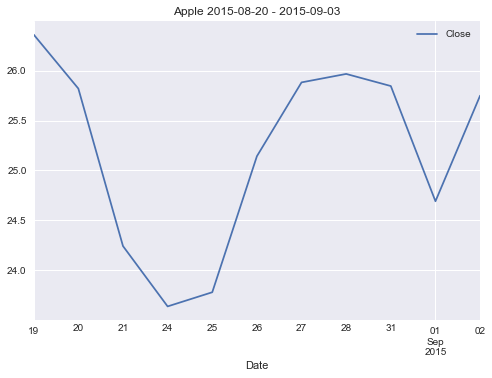

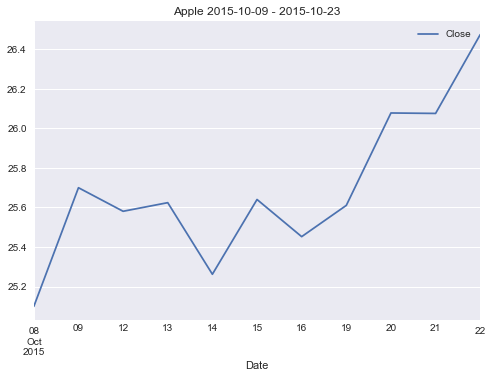

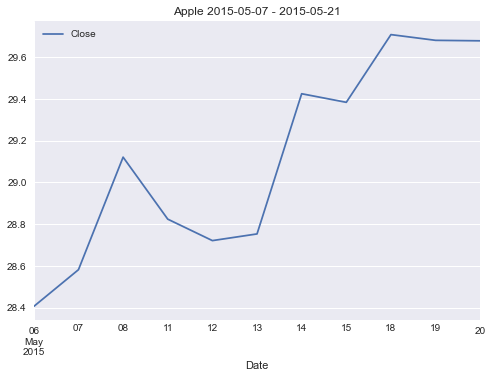

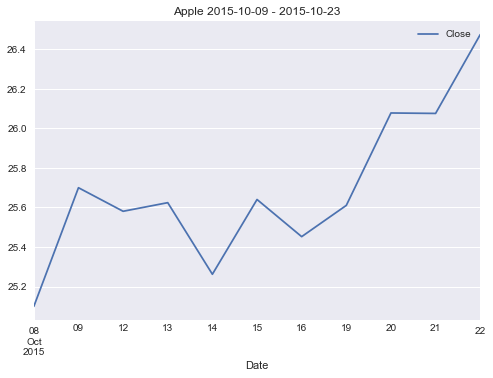

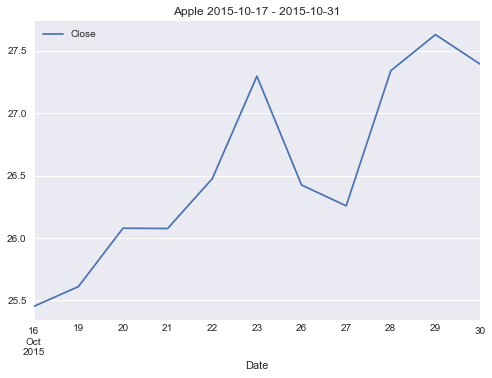

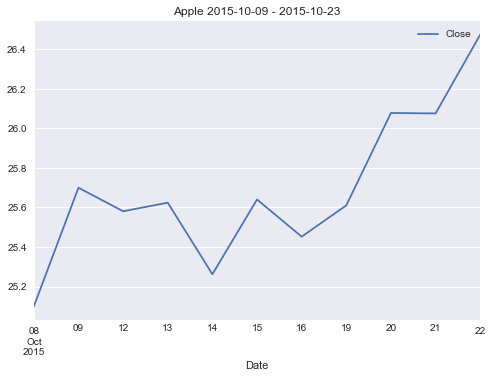

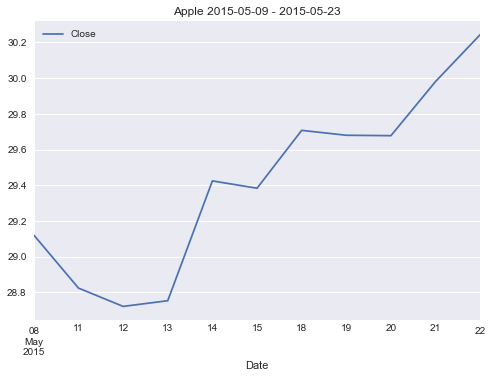

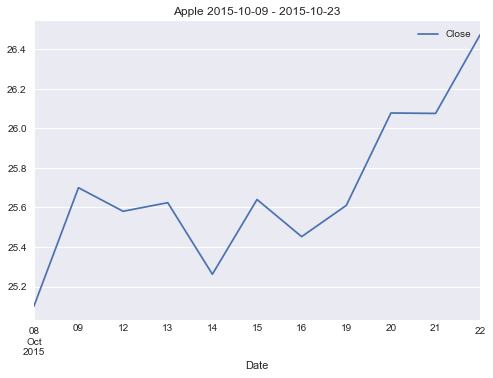

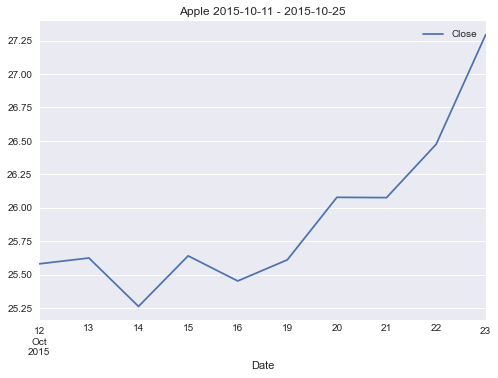

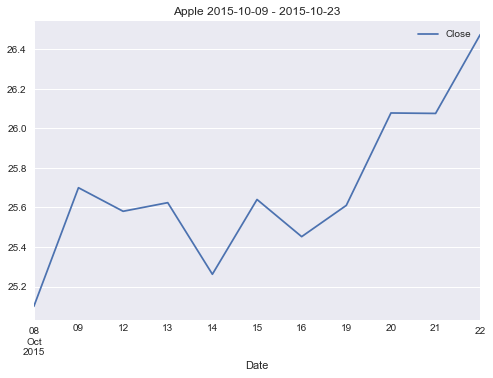

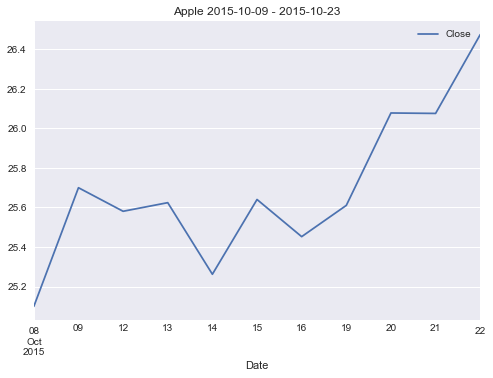

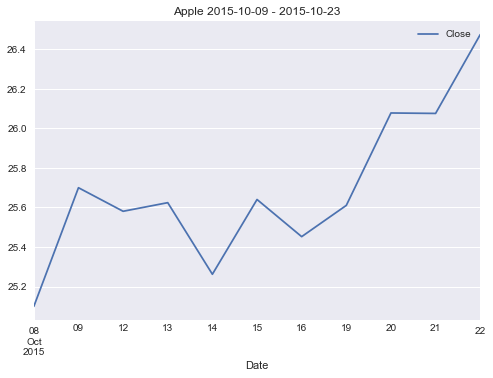

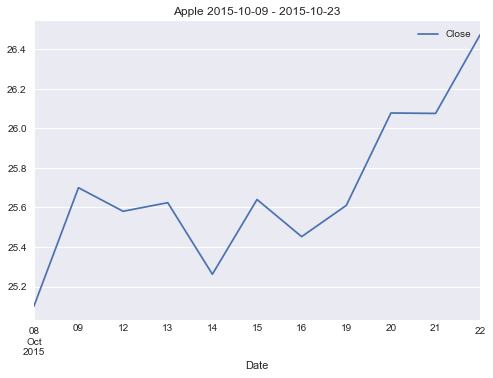

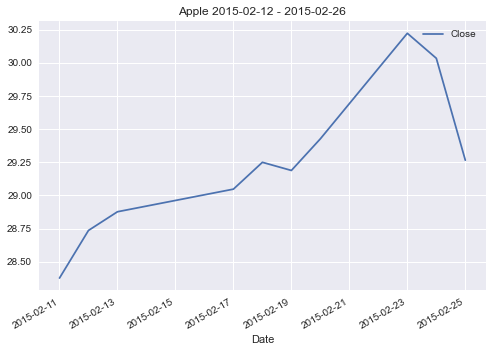

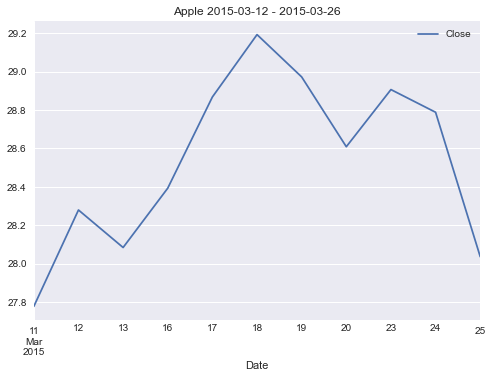

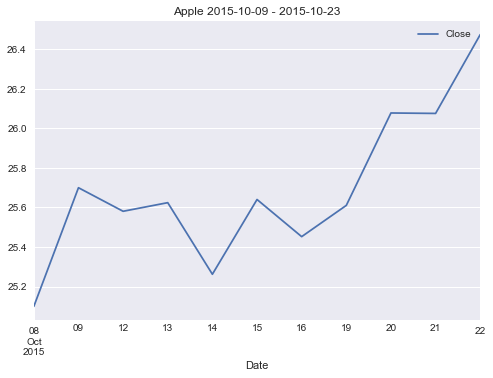

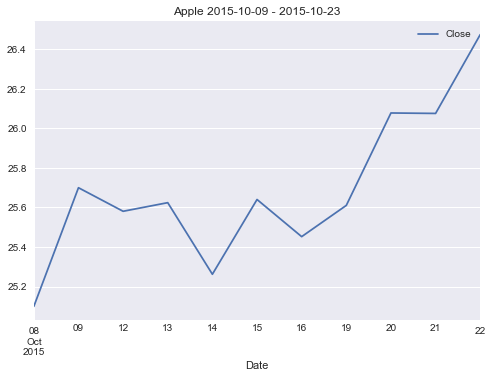

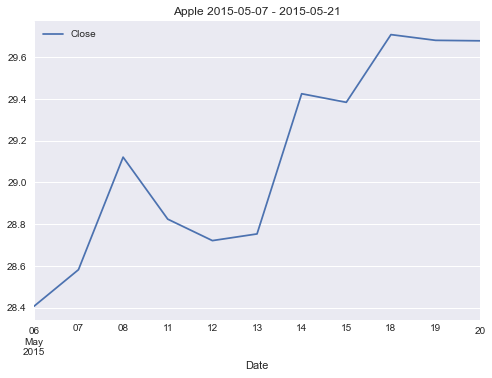

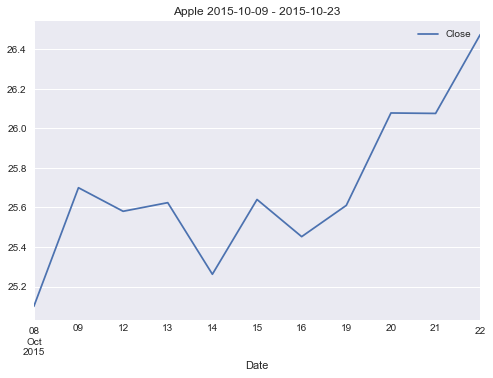

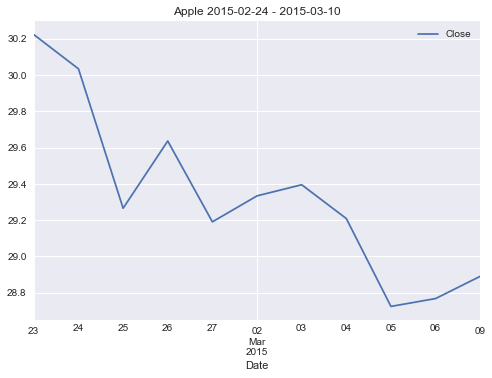

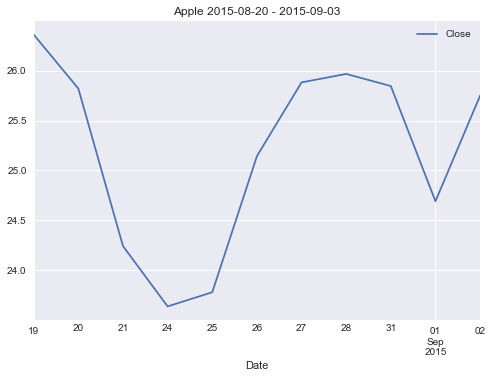

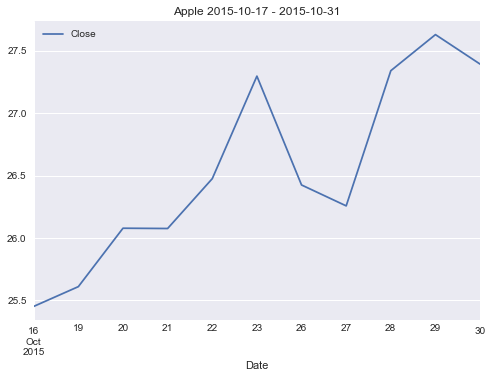

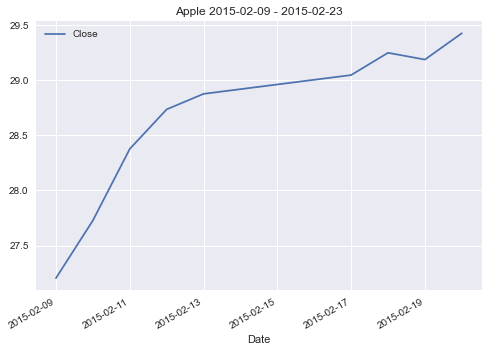

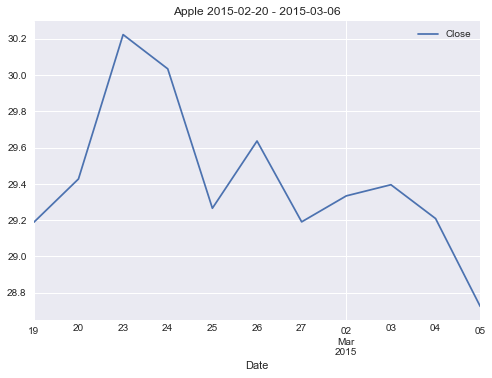

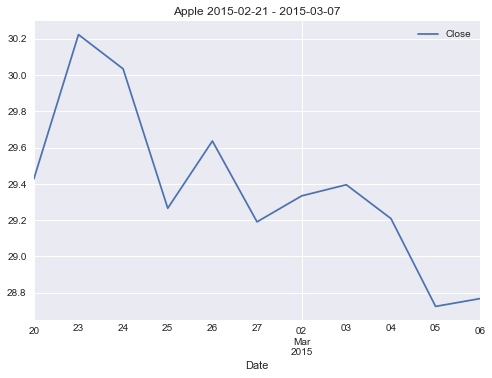

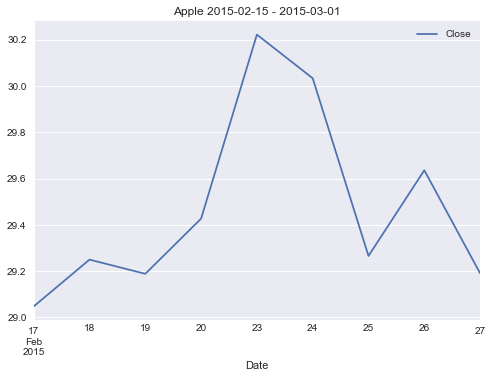

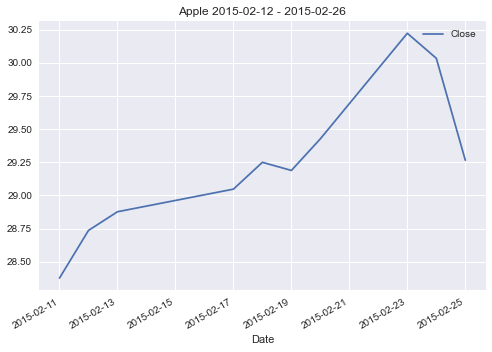

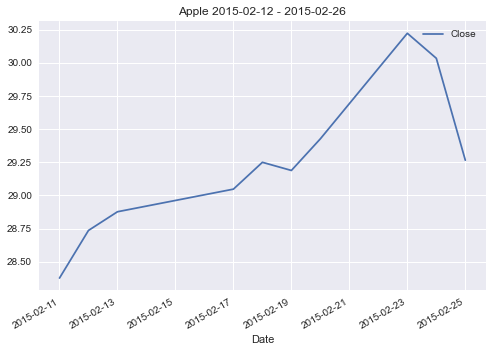

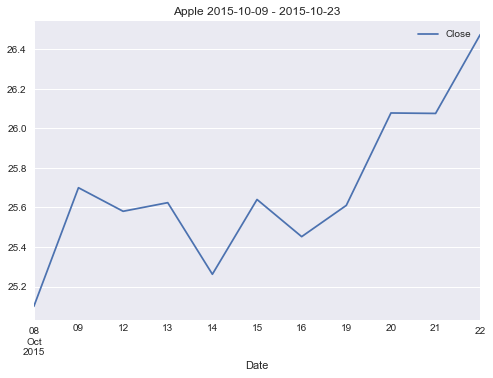

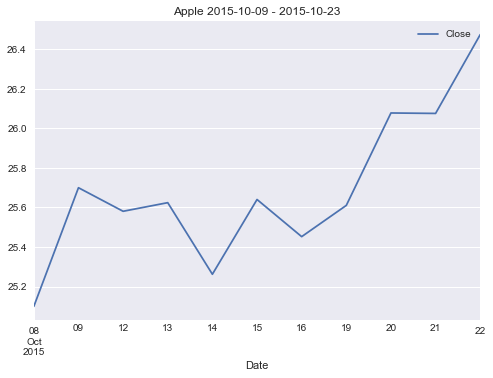

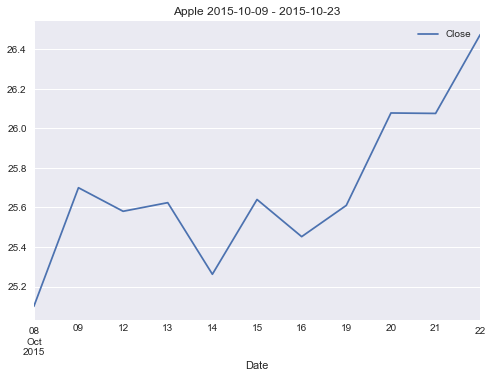

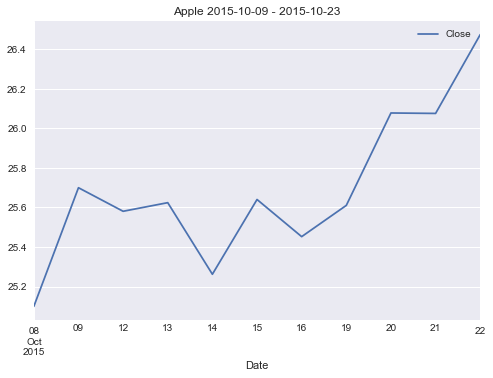

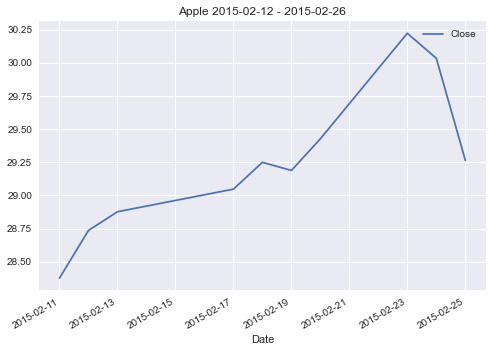

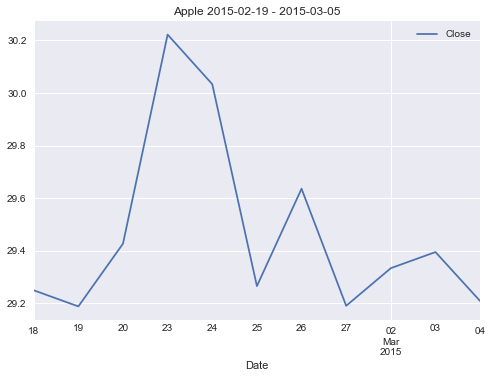

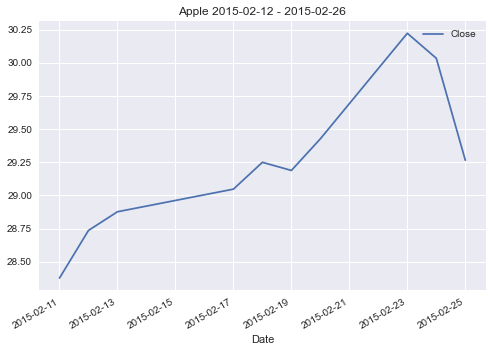

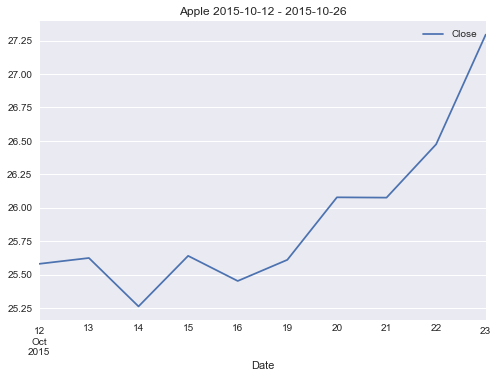

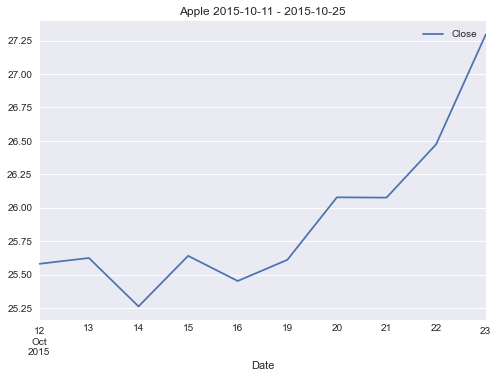

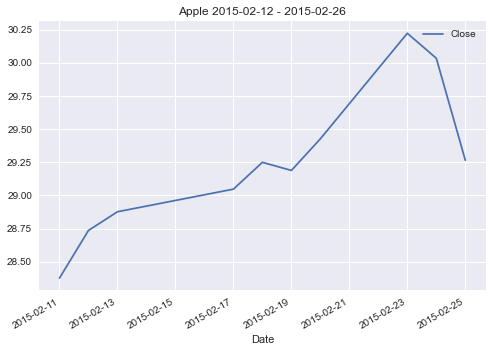

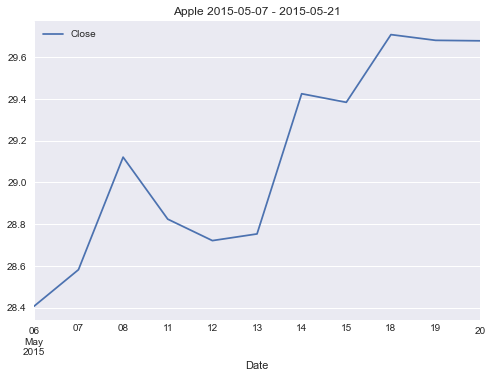

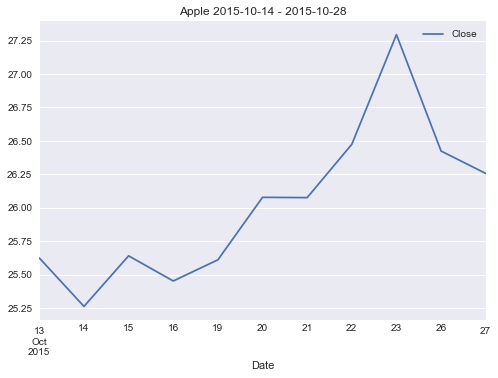

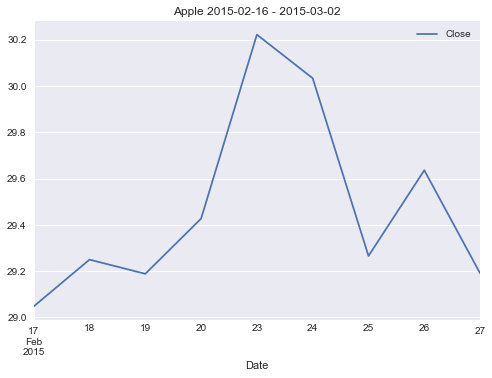

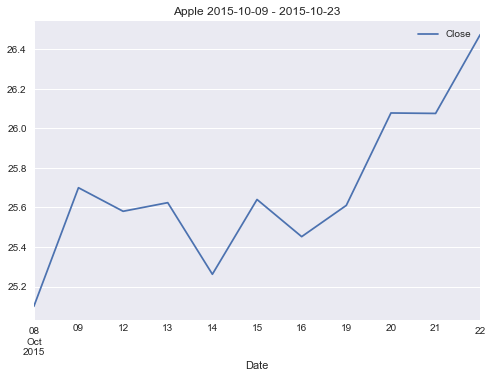

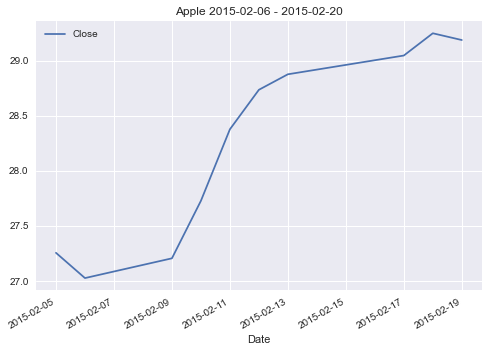

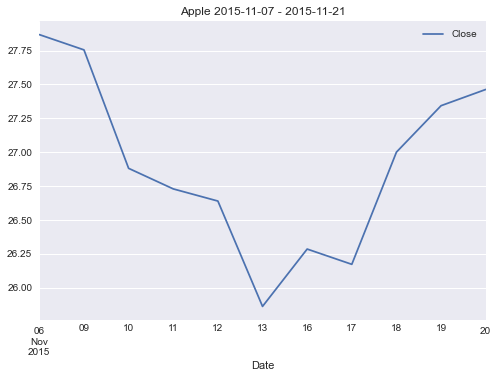

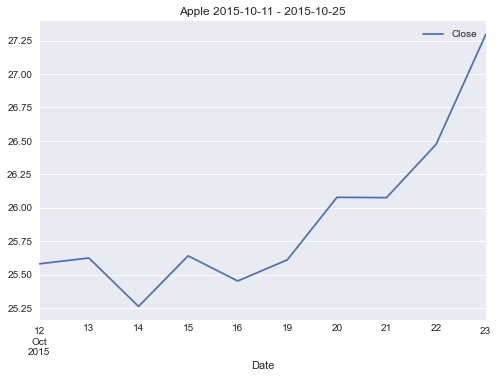

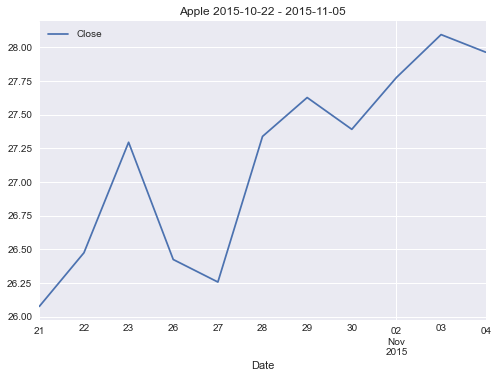

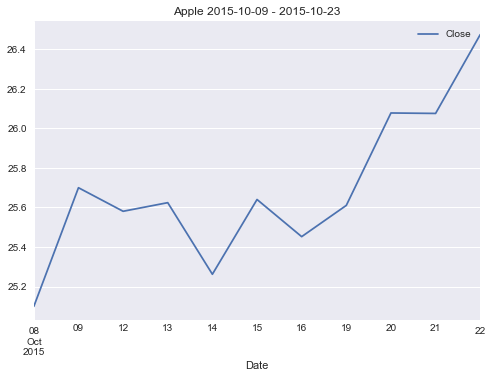

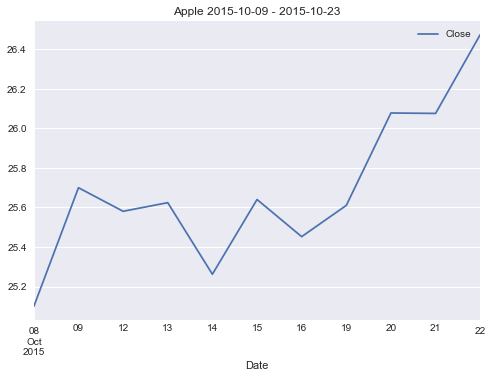

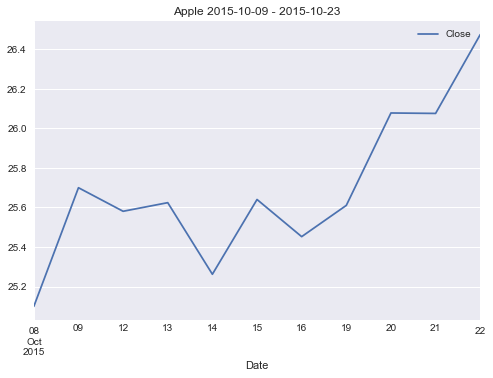

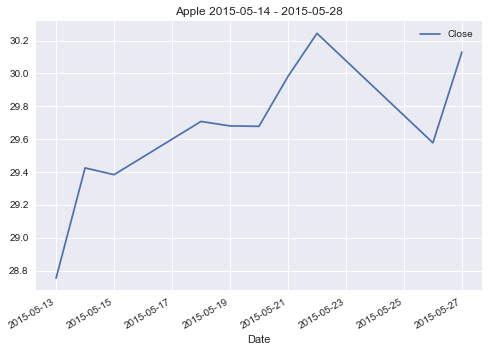

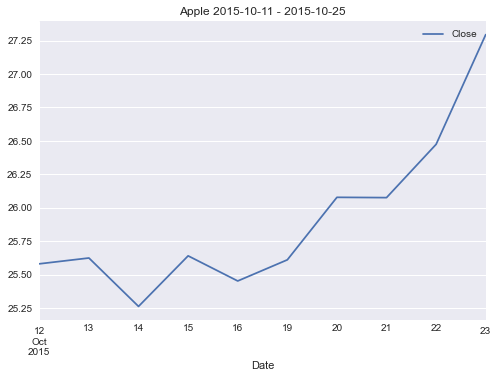

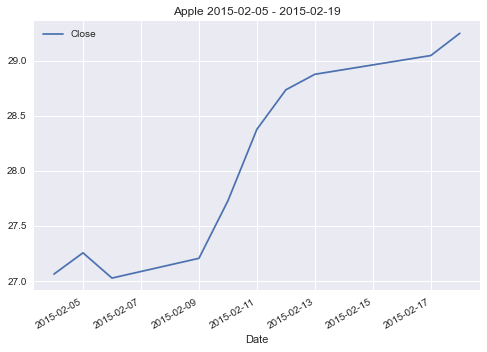

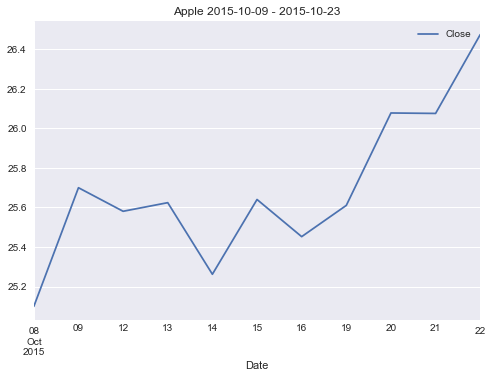

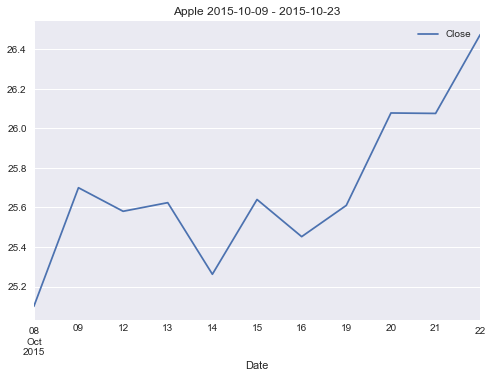

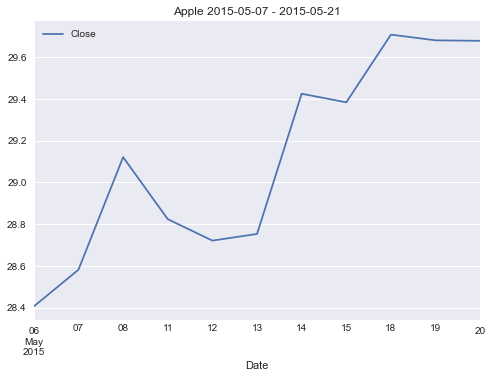

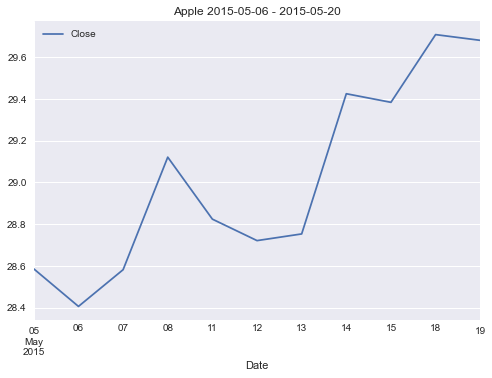

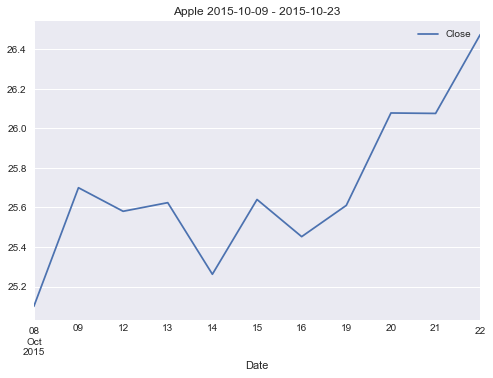

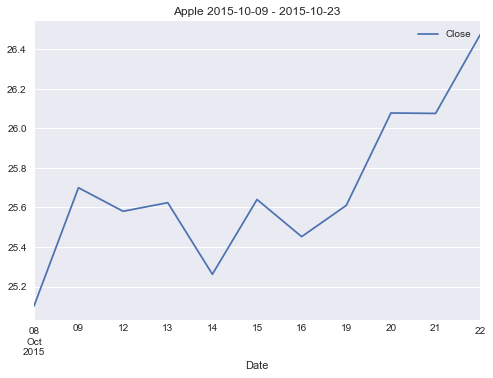

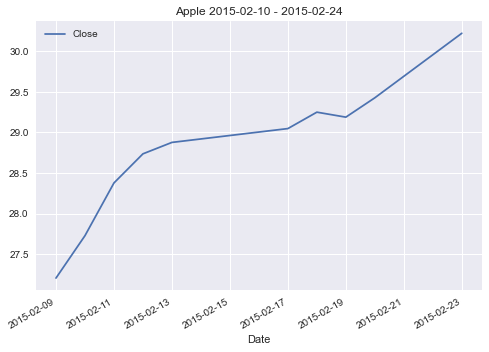

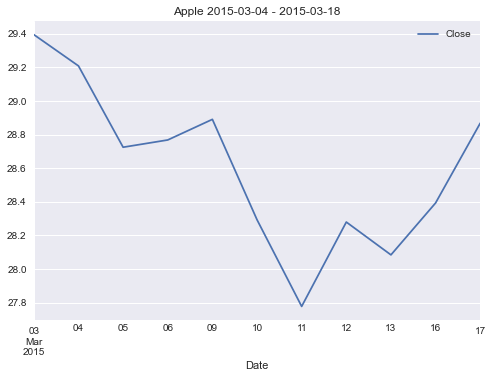

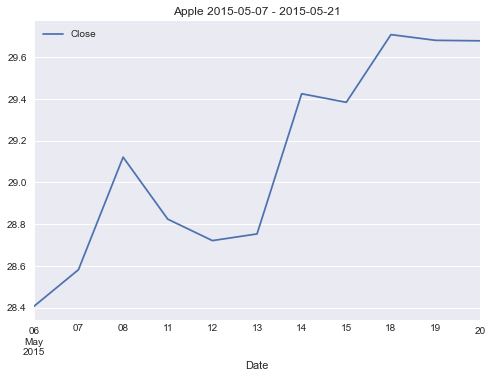

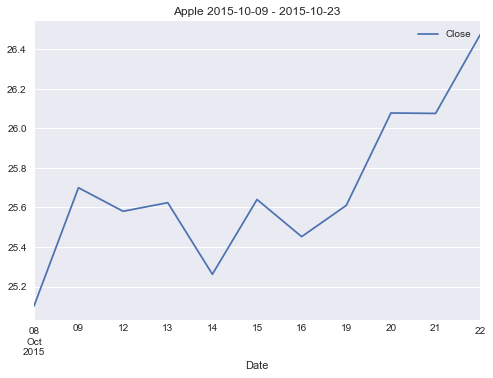

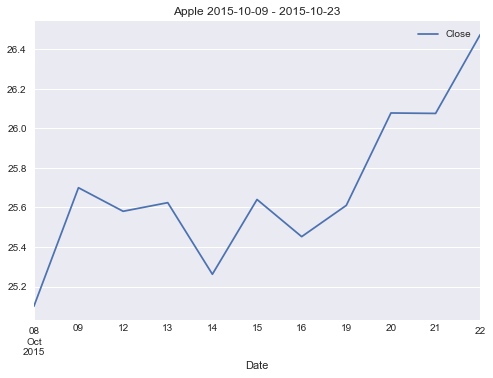

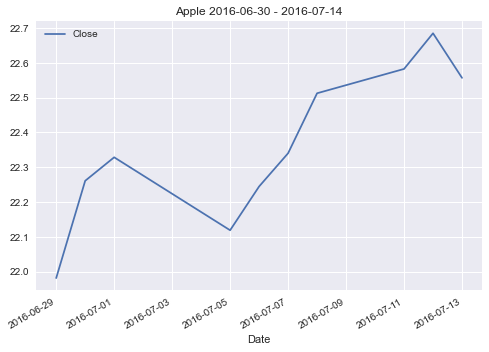

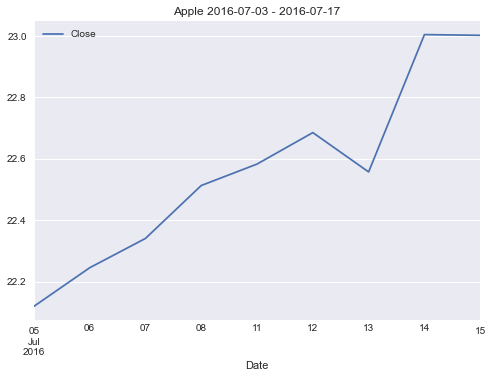

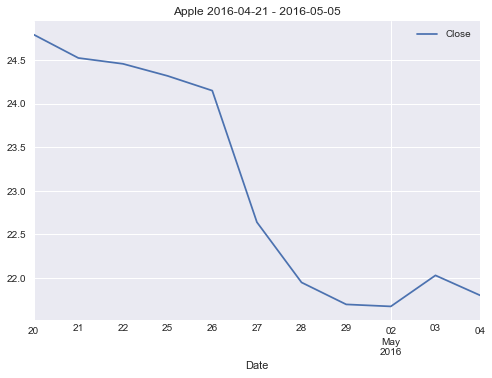

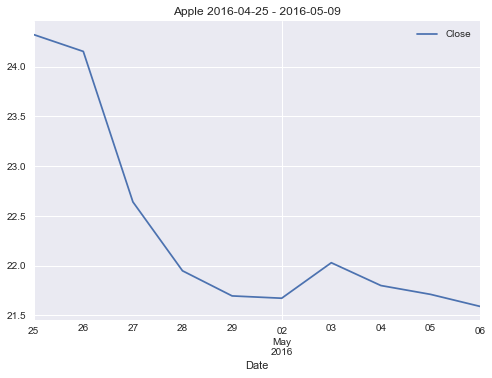

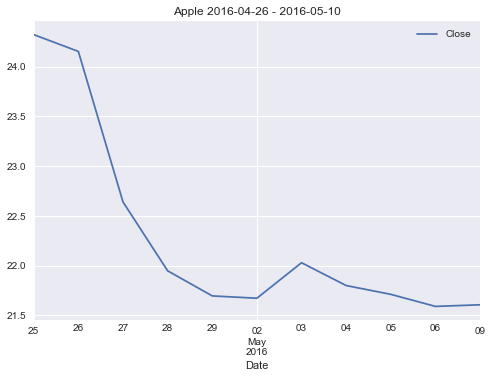

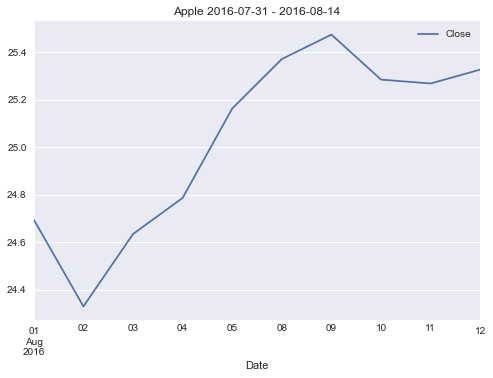

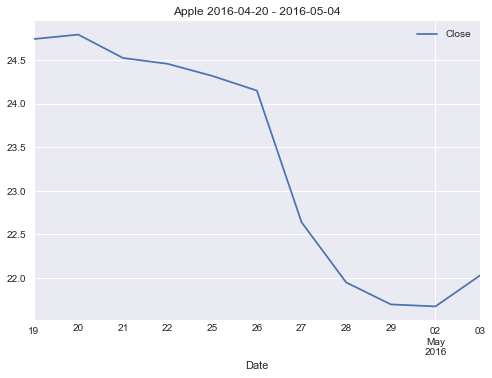

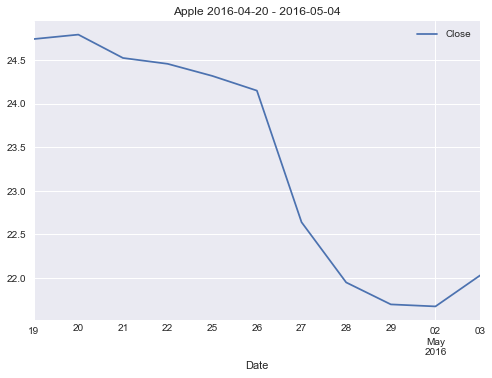

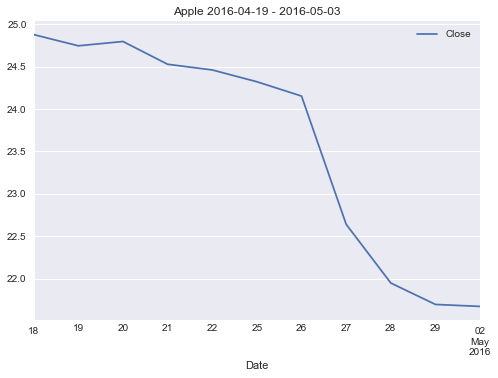

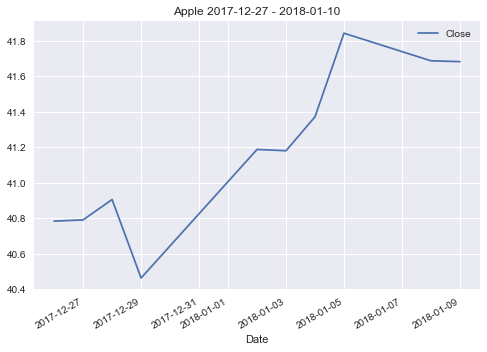

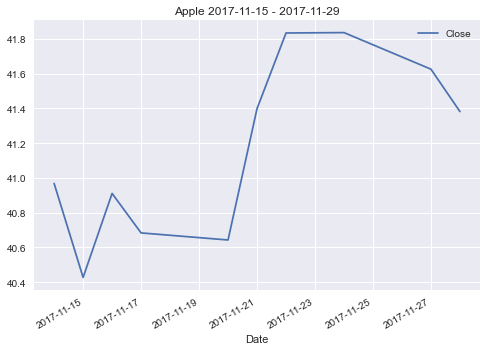

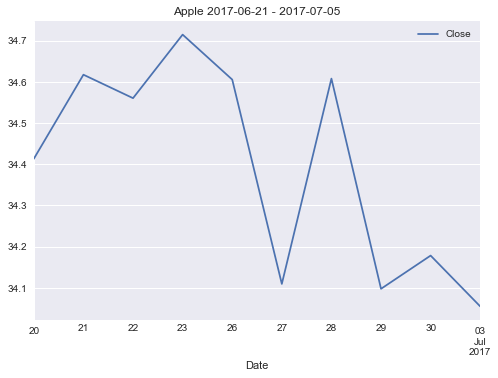

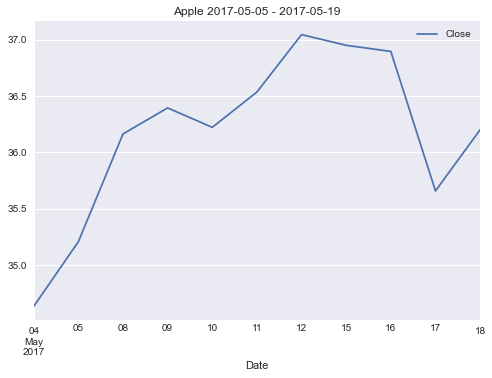

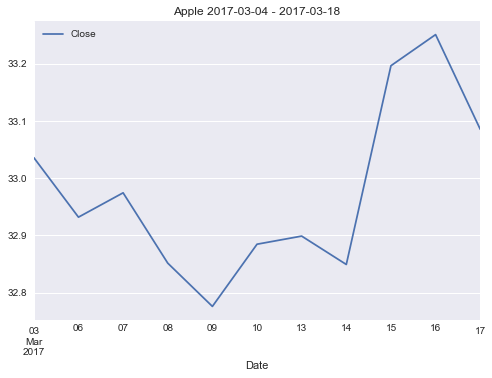

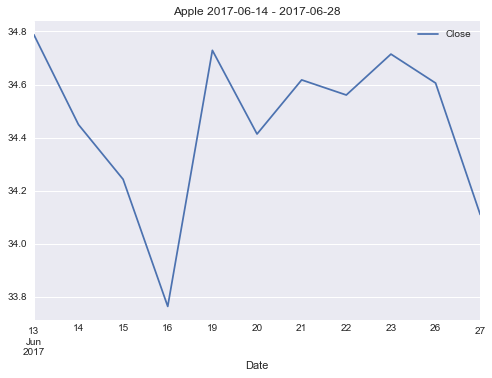

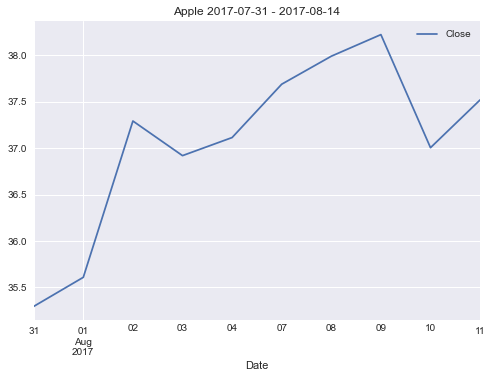

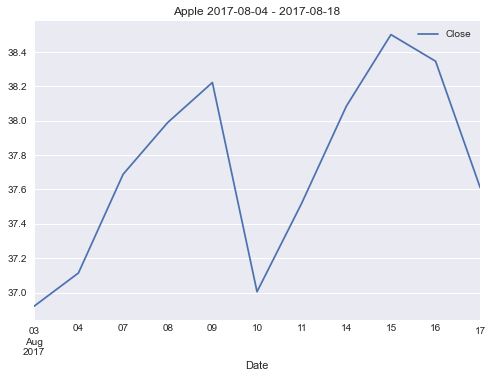

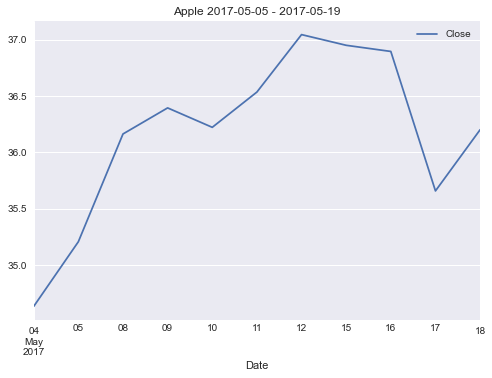

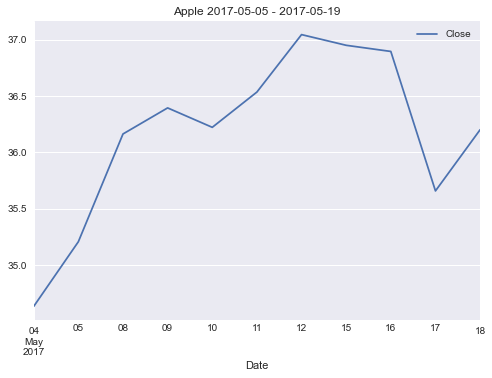

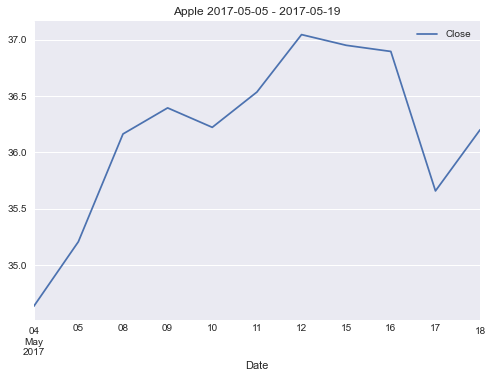

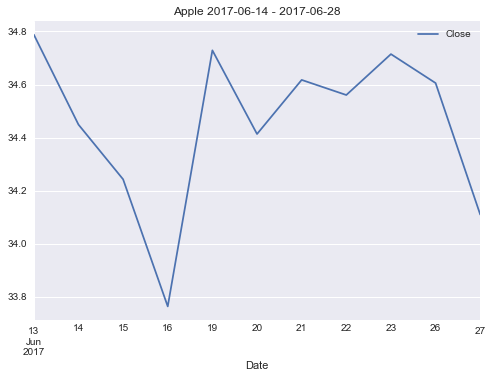

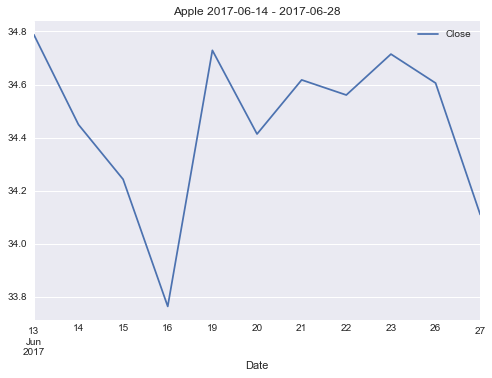

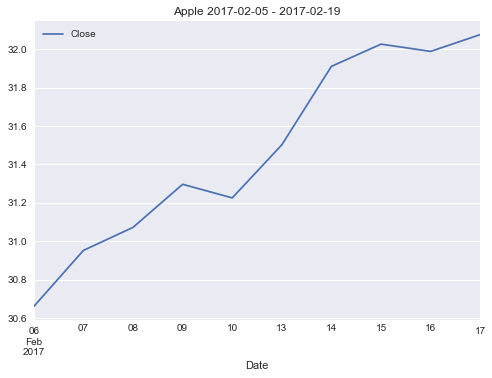

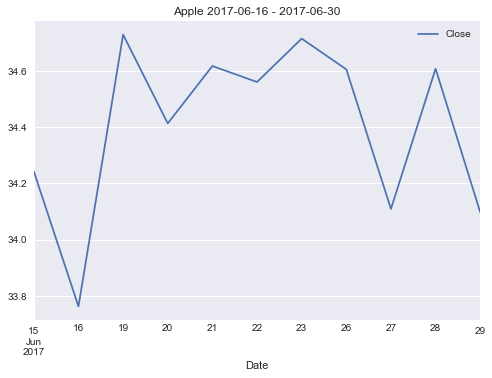

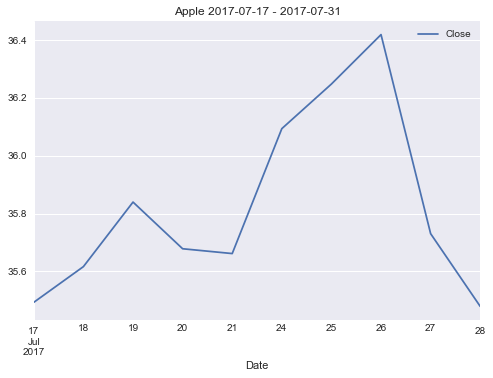

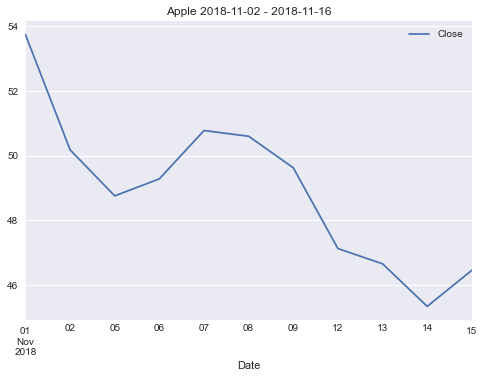

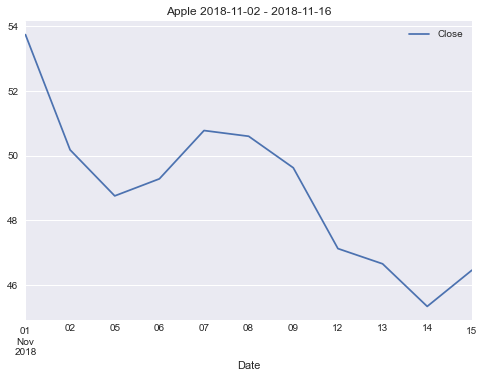

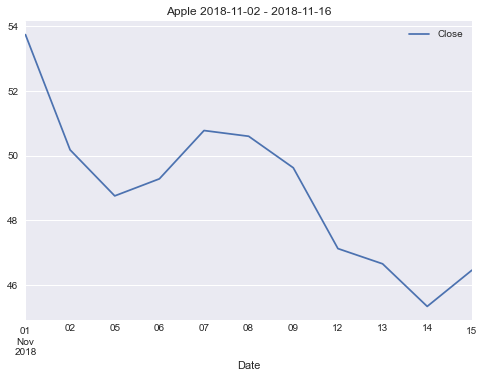

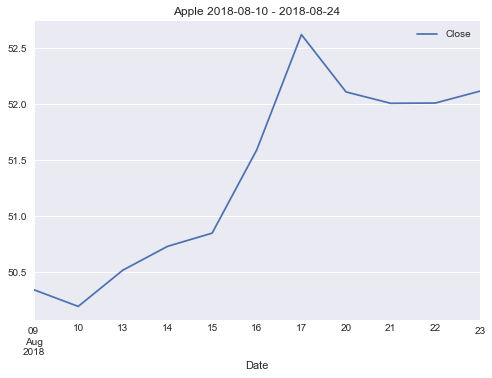

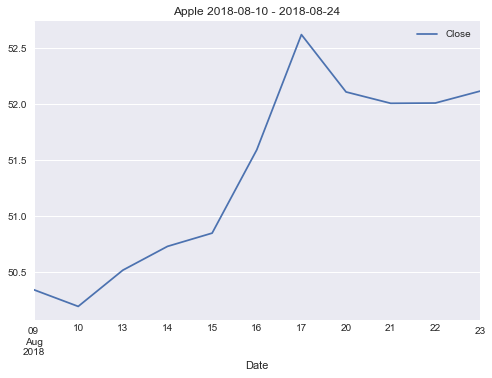

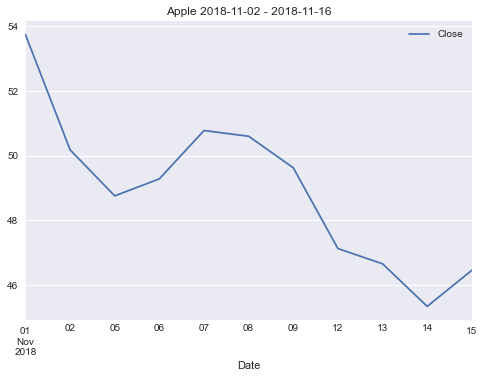

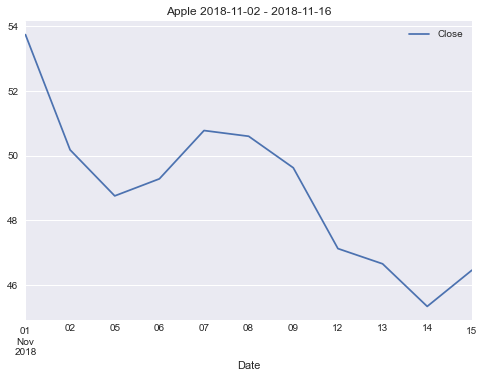

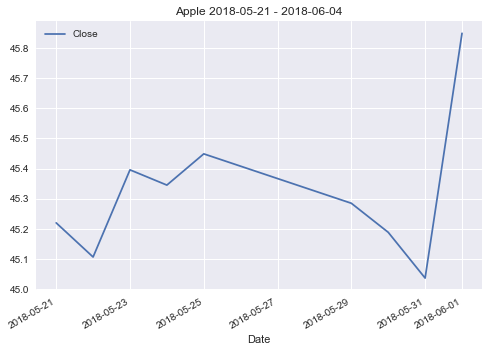

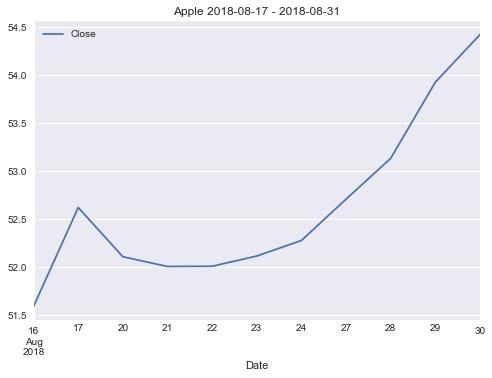

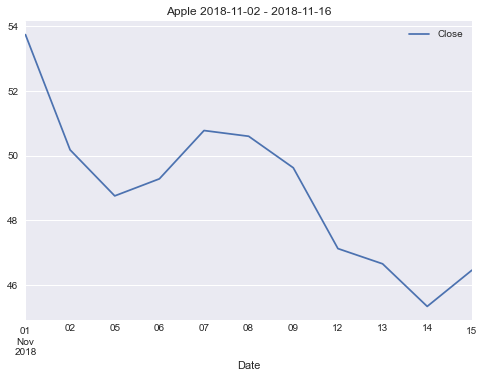

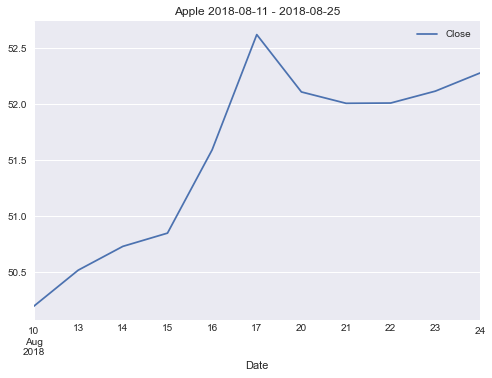

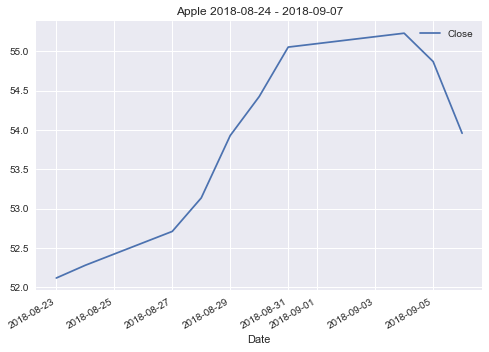

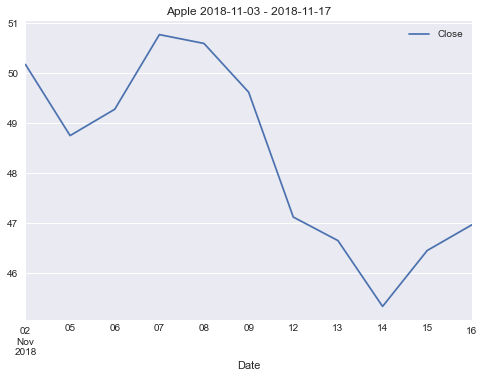

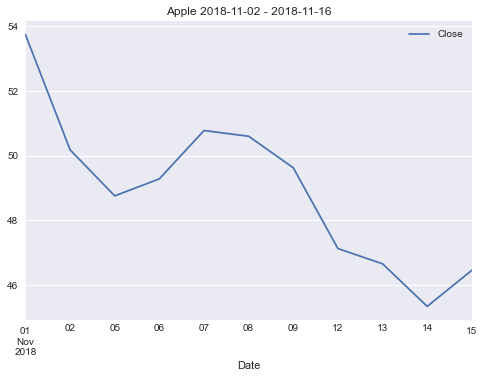

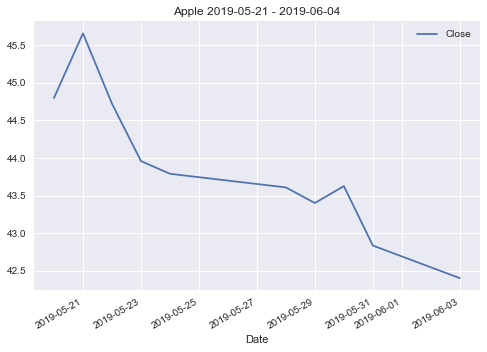

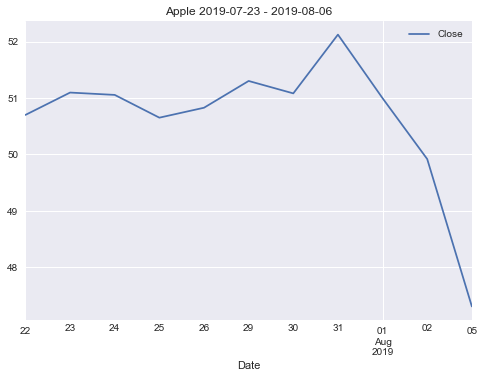

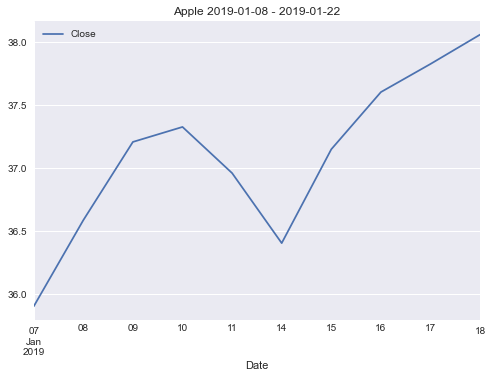

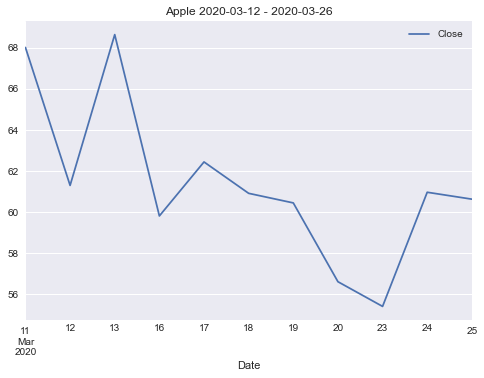

In [5]:
weeks = 2
days = 0

for i in range(len(apples)):
    start_date, end_date = get_dates(apples.iloc[i]['date'], weeks, days)
    stock_df = stock_history(apples.iloc[i]['ORG'], start_date, end_date, plot=True)